In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
# !curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import conda_installer
import matplotlib.pyplot as plt
# conda_installer.install()
conda_installer.install()
# !/root/miniconda/bin/conda info -e
import rdkit

2023-02-06 09:31:19.557271: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-06 09:31:19.557286: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
add /home/ali/miniconda/lib/python3.8/site-packages to PYTHONPATH
all packages are already installed


In [2]:
df = pd.read_csv('../Datasets/Mobley/info.csv')
df = df.dropna()
# df = df[df['Dataset Name'] == 'cd-set1']

In [3]:
training_cols = [col for col in df.columns if (col[:3] == 'gb_' and not col.__contains__('Etot') and not col.__contains__('Ex_') and not col.__contains__('delta')) or (col.__contains__('VDWAALS'))]
# training_cols = ['gb_Ex_difference']

In [4]:
df[['EX _H_(kcal/mol)', 'gb_Ex_difference']]

,EX _H_(kcal/mol),gb_Ex_difference
0,-2.170,0.1750
1,-4.190,-7.0724
2,-5.460,-9.9474
3,-2.740,-7.8186
4,-2.990,-11.5617
5,-2.530,-3.3226
6,-3.400,-8.4633
7,-4.890,-10.9281
8,-2.570,-0.2151
9,-2.680,-1.4122


In [5]:
df

,ID,dataset group name,Dataset Name,Host,Guest,Ex _G_(kcal/mol),Ex _G_SEM,EX _H_(kcal/mol),EX _H_SEM,pb_guest_Etot,...,gb_host_1-4EEL,gb_host_EELEC,gb_host_EGB,gb_host_ESURF,gb_delta_H,pb_delta_H,EX _delta_H_(kcal/mol),gb_Ex_difference,SQR_gbnsr6_Ex_difference,pb_Ex_difference
0,1,Mobley benchmarkset,cd-set1,acd,guest-1,-1.575,0.019,-2.170,0.050,-47.8832,...,423.5761,-428.9520,-96.4471,5.1691,-1.9950,-0.8408,-2.170,0.1750,0.030625,1.329200
1,2,Mobley benchmarkset,cd-set1,acd,guest-2,-3.533,0.004,-4.190,0.020,-52.0758,...,412.6663,-397.9784,-106.4154,5.0726,-11.2624,-8.4809,-4.190,-7.0724,50.018842,-4.290900
2,3,Mobley benchmarkset,cd-set1,acd,guest-3,-4.606,0.007,-5.460,0.030,-51.5323,...,426.2925,-429.3068,-95.2452,5.1352,-15.4074,-13.8234,-5.460,-9.9474,98.950767,-8.363400
3,4,Mobley benchmarkset,cd-set1,acd,guest-4,-2.130,0.016,-2.740,0.020,2.3898,...,420.0687,-416.5215,-97.4461,5.0849,-10.5586,-11.3319,-2.740,-7.8186,61.130506,-8.591900
4,5,Mobley benchmarkset,cd-set1,acd,guest-5,-2.510,0.060,-2.990,0.230,-3.2280,...,425.7315,-435.9689,-91.2312,5.0881,-14.5517,-14.0485,-2.990,-11.5617,133.672907,-11.058500
5,6,Mobley benchmarkset,cd-set1,acd,guest-6,-1.506,0.036,-2.530,0.120,-56.4635,...,422.4095,-421.3737,-99.7968,5.1792,-5.8526,-7.6596,-2.530,-3.3226,11.039671,-5.129600
6,7,Mobley benchmarkset,cd-set1,acd,guest-7,-3.380,0.005,-3.400,0.020,-71.4929,...,422.3651,-398.7469,-106.3300,5.0312,-11.8633,-11.0241,-3.400,-8.4633,71.627447,-7.624100
7,8,Mobley benchmarkset,cd-set1,acd,guest-8,-4.622,0.017,-4.890,0.030,-70.0470,...,418.4633,-421.1437,-95.0137,5.1211,-15.8181,-14.5525,-4.890,-10.9281,119.423370,-9.662500
8,9,Mobley benchmarkset,cd-set1,acd,guest-9,-1.685,0.018,-2.570,0.060,-40.7839,...,426.4985,-421.9704,-93.9633,5.2166,-2.7851,-1.3499,-2.570,-0.2151,0.046268,1.220100
9,10,Mobley benchmarkset,cd-set1,acd,guest-10,-1.764,0.020,-2.680,0.070,15.6104,...,421.9775,-406.1717,-103.9776,5.0478,-4.0922,-1.9281,-2.680,-1.4122,1.994309,0.751900


In [6]:
PDBs = {}
from os import listdir
from os.path import isfile, join
pdb_paths = [
    '../Datasets/Mobley/cd-set1/pdb/',
    '../Datasets/Mobley/cd-set2/pdb/',
    '../Datasets/Mobley/gdcc-set1/pdb/',
    '../Datasets/Mobley/BRD4/pdb/',
]
for mypath in pdb_paths:
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    host_name = [x for x in onlyfiles if x.__contains__('host') or x.__contains__('BRD')][0]
    host_mol = rdkit.Chem.rdmolfiles.MolFromPDBFile(mypath + '/' + host_name)
    onlyfiles.remove(host_name)
    for f in onlyfiles:
        if f.split('.')[0] in df['Guest'].to_numpy():
            guest_mol = rdkit.Chem.rdmolfiles.MolFromPDBFile(mypath + '/' + f)
            PDBs.update({host_name.split('.')[0] + '_' + f.split('.')[0] : rdkit.Chem.CombineMols(host_mol,guest_mol)})

In [7]:
PDBs

{'host-acd_guest-2': <rdkit.Chem.rdchem.Mol at 0x7f3dccfb2040>,
 'host-acd_guest-8': <rdkit.Chem.rdchem.Mol at 0x7f3dcbd44280>,
 'host-acd_guest-1': <rdkit.Chem.rdchem.Mol at 0x7f3dcbd443a0>,
 'host-acd_guest-7': <rdkit.Chem.rdchem.Mol at 0x7f3dcbd444c0>,
 'host-acd_guest-6': <rdkit.Chem.rdchem.Mol at 0x7f3dcbd446a0>,
 'host-acd_guest-3': <rdkit.Chem.rdchem.Mol at 0x7f3dcbd44700>,
 'host-acd_guest-4': <rdkit.Chem.rdchem.Mol at 0x7f3dcbd44760>,
 'host-acd_guest-5': <rdkit.Chem.rdchem.Mol at 0x7f3dcbd447c0>,
 'host-bcd_guest-2': <rdkit.Chem.rdchem.Mol at 0x7f3dccfb27c0>,
 'host-bcd_guest-8': <rdkit.Chem.rdchem.Mol at 0x7f3dccfb20a0>,
 'host-bcd_guest-1': <rdkit.Chem.rdchem.Mol at 0x7f3dcbd44880>,
 'host-bcd_guest-7': <rdkit.Chem.rdchem.Mol at 0x7f3dcbd44820>,
 'host-bcd_guest-6': <rdkit.Chem.rdchem.Mol at 0x7f3dcbd44940>,
 'host-bcd_guest-3': <rdkit.Chem.rdchem.Mol at 0x7f3dcbd449a0>,
 'host-bcd_guest-11': <rdkit.Chem.rdchem.Mol at 0x7f3dcbd44a00>,
 'host-bcd_guest-10': <rdkit.Chem.rdche

# Check if adj matrix can be tensorized

In [8]:
%cd ..

/home/ali/GBNN


In [9]:
%cd PGGCN

/home/ali/GBNN/PGGCN


In [10]:
info = []
for pdb in list(PDBs.keys()):
    info.append(df[df['Guest'] == pdb.split('_')[1].replace('-s', '-')][training_cols].to_numpy()[0])

In [11]:
from dcFeaturizer import atom_features as get_atom_features
def featurize(molecule, info):
    
    atom_features = []
    for atom in molecule.GetAtoms():
        new_feature = get_atom_features(atom).tolist()
        position = molecule.GetConformer().GetAtomPosition(atom.GetIdx())
        new_feature += [atom.GetMass(), atom.GetAtomicNum()]
        new_feature += [position.x, position.y, position.z]
        for neighbor in atom.GetNeighbors()[:2]:
            neighbor_idx = neighbor.GetIdx()
            new_feature += [neighbor_idx]
        for i in range(2 - len(atom.GetNeighbors())):
            new_feature += [-1]
        atom_features.append(np.concatenate([new_feature, info], 0))
    return np.array(atom_features)

In [12]:
X = []
y = []
for i, pdb in enumerate(list(PDBs.keys())):
    X.append(featurize(PDBs[pdb], info[i]))
    y.append(df[df['Guest'] == pdb.split('_')[1].replace('-s', '-')]['EX _H_(kcal/mol)'].abs().to_numpy()[0])

In [13]:
X_train, X_test, y_train, y_test = X[:int(.8*len(X))], X[int(.8*len(X)):], y[:int(.8*len(X))], y[int(.8*len(X)):]
info_train, info_test = info[:int(.8*len(X))], info[int(.8*len(X)):]

In [14]:
y_test

[2.74, 2.99, 11.73, 6.16, 6.96, 7.88, 8.42]

In [15]:
sample_x_atoms = X[:10]
for i in range(len(sample_x_atoms)):
    if sample_x_atoms[i].shape[0] < 2000:
        new_list = sample_x_atoms[i].tolist()
        for j in range(2000 - sample_x_atoms[i].shape[0]):
            new_list.append([0.0]*53)
#         new_list.append(np.concatenate((info[i], [0]*65)))
        sample_x_atoms[i] = np.array(new_list)
sample_x_atoms = np.array(sample_x_atoms)

In [106]:
info[0]

array([-3.831000e-01, -2.713340e+01, -4.407660e+01,  4.289798e+02,
       -3.760288e+02, -1.764630e+02,  4.988800e+00,  1.631350e+01,
        1.156370e+01, -6.678690e+01,  1.743800e+00,  4.126663e+02,
       -3.979784e+02, -1.064154e+02,  5.072600e+00])

In [111]:
sample_x_atoms[0][0][38:]

array([-3.831000e-01, -2.713340e+01, -4.407660e+01,  4.289798e+02,
       -3.760288e+02, -1.764630e+02,  4.988800e+00,  1.631350e+01,
        1.156370e+01, -6.678690e+01,  1.743800e+00,  4.126663e+02,
       -3.979784e+02, -1.064154e+02,  5.072600e+00])

In [89]:
info[0]

array([-3.831000e-01, -2.713340e+01, -4.407660e+01,  4.289798e+02,
       -3.760288e+02, -1.764630e+02,  4.988800e+00,  1.631350e+01,
        1.156370e+01, -6.678690e+01,  1.743800e+00,  4.126663e+02,
       -3.979784e+02, -1.064154e+02,  5.072600e+00])

In [15]:
physics_info = []
for i in range(len(X_train)):
    physics_info.append(X_train[i][0][38:])

In [169]:
X_train[:,0,38:].shape

(24, 15)

In [25]:
import layers_update_mobley as layers
import importlib
import tensorflow_addons as tfa
importlib.reload(layers)


class PGGCNModel(tf.keras.Model):
    def __init__(self, num_atom_features = 36, r_out_channel = 20, c_out_channel = 128):
        super().__init__()
        self.ruleGraphConvLayer = layers.RuleGraphConvLayer(r_out_channel, num_atom_features, 0)
        self.ruleGraphConvLayer.combination_rules = []
        self.conv = layers.ConvLayer(c_out_channel)
        self.dense1 = tf.keras.layers.Dense(64, activation='relu', name='dense1')
#         self.dense2 = tf.keras.layers.Dense(32, activation='sigmoid')
#         self.dense3 = tf.keras.layers.Dense(100, activation='relu')
#         self.dense4 = tf.keras.layers.Dense(80, activation='relu')
        self.dense5 = tf.keras.layers.Dense(16, name='relu')
        self.dense6 = tf.keras.layers.Dense(1, name='dense6')
        self.dense7 = tf.keras.layers.Dense(1, name='dense7',
                 kernel_initializer=tf.keras.initializers.Constant([-.2,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1]),
                 bias_initializer=tf.keras.initializers.Zeros())
        self.all_layer_1_weights = []
        
    def addRule(self, rule, start_index, end_index = None):
        self.ruleGraphConvLayer.addRule(rule, start_index, end_index)
    
    def set_input_shapes(self, i_s):
        self.i_s = i_s

    def call(self, inputs):
        physics_info = inputs[:,0,38:]
        x_a = []
        for i in range(len(self.i_s)):
            x_a.append(inputs[i][:self.i_s[i], :38])
#         agg = []
#         for i in range(len(x_a)):
#             agg.append([x_a[i], self.a_l[i]])
        x = self.ruleGraphConvLayer(x_a)
        self.all_layer_1_weights.append(self.ruleGraphConvLayer.w_s)
        x = self.conv(x)
        x = self.dense1(x)
#         x = self.dense2(x)
#         x = self.dense3(x)
#         x = self.dense4(x)
        x = self.dense5(x)
        model_var = self.dense6(x)
        merged = tf.concat([model_var, physics_info], axis=1)
        out = self.dense7(merged)
        return out

m = PGGCNModel()
m.addRule("sum", 0, 31)
m.addRule("multiply", 31, 33)
m.addRule("distance", 33, 36)

import keras.backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred[0] - y_true))) + K.abs(1 / K.mean(.2 + y_pred[1]))
def pure_rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))
    

optimizers = [
    tf.keras.optimizers.Adam(learning_rate=0.1),
    tf.keras.optimizers.Adam(learning_rate=0.005)
]
optimizers_and_layers = [(optimizers[0], m.layers[:len(m.layers) - 1]), 
                         (optimizers[1], m.layers[len(m.layers) - 1])]    
optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers)

opt = tf.keras.optimizers.Adam(learning_rate=1e-4)
m.compile(loss=pure_rmse, optimizer=opt)

X_train, X_test, y_train, y_test = X[:int(.8*len(X))], X[int(.8*len(X)):], y[:int(.8*len(X))], y[int(.8*len(X)):]
info_train, info_test = info[:int(.8*len(X))], info[int(.8*len(X)):]

input_shapes = []
for i in range(len(X_train)):
    input_shapes.append(np.array(X_train[i]).shape[0])
m.set_input_shapes(input_shapes)
for i in range(len(X_train)):
    if X_train[i].shape[0] < 2000:
        new_list = np.zeros([2000 - X_train[i].shape[0], 53])
#         for j in range(2000 - X_atoms[i].shape[0]):
#             new_list.append(np.zeros(53))
#         new_list.append(np.concatenate((info[i], [0]*65)))
        X_train[i] = np.concatenate([X_train[i], new_list], 0)
X_train = np.array(X_train)
y = np.array(y_train)
hist = m.fit(X_train, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 26s 26s/step - loss: 16.4058
Epoch 2/100
1/1 [==============================] - 0s 97ms/step - loss: 15.5729
Epoch 3/100
1/1 [==============================] - 0s 141ms/step - loss: 14.7195
Epoch 4/100
1/1 [==============================] - 0s 140ms/step - loss: 13.8376
Epoch 5/100
1/1 [==============================] - 0s 131ms/step - loss: 12.9476
Epoch 6/100
1/1 [==============================] - 0s 134ms/step - loss: 12.0982
Epoch 7/100
1/1 [==============================] - 0s 136ms/step - loss: 11.3361
Epoch 8/100
1/1 [==============================] - 0s 133ms/step - loss: 10.3172
Epoch 9/100
1/1 [==============================] - 0s 122ms/step - loss: 9.5592
Epoch 10/100
1/1 [==============================] - 0s 136ms/step - loss: 8.7262
Epoch 11/100
1/1 [==============================] - 0s 129ms/step - loss: 7.9661
Epoch 12/100
1/1 [==============================] - 0s 131ms/step - loss: 7.1352
Epoch 13/100
1/1 [=============

In [100]:
m.predict(X_train)

array([[2.7801828],
       [2.8804176],
       [2.71336  ],
       [2.8135953],
       [2.746771 ],
       [2.8470078],
       [2.746771 ],
       [2.8135953],
       [3.214533 ],
       [3.214533 ],
       [3.1477118],
       [3.214533 ],
       [3.1477118],
       [3.1142993],
       [3.3147707],
       [3.2813592],
       [3.1811252],
       [3.247946 ],
       [3.1811252],
       [3.3147707],
       [5.01876  ],
       [4.951942 ],
       [5.0855875],
       [4.8851156]], dtype=float32)

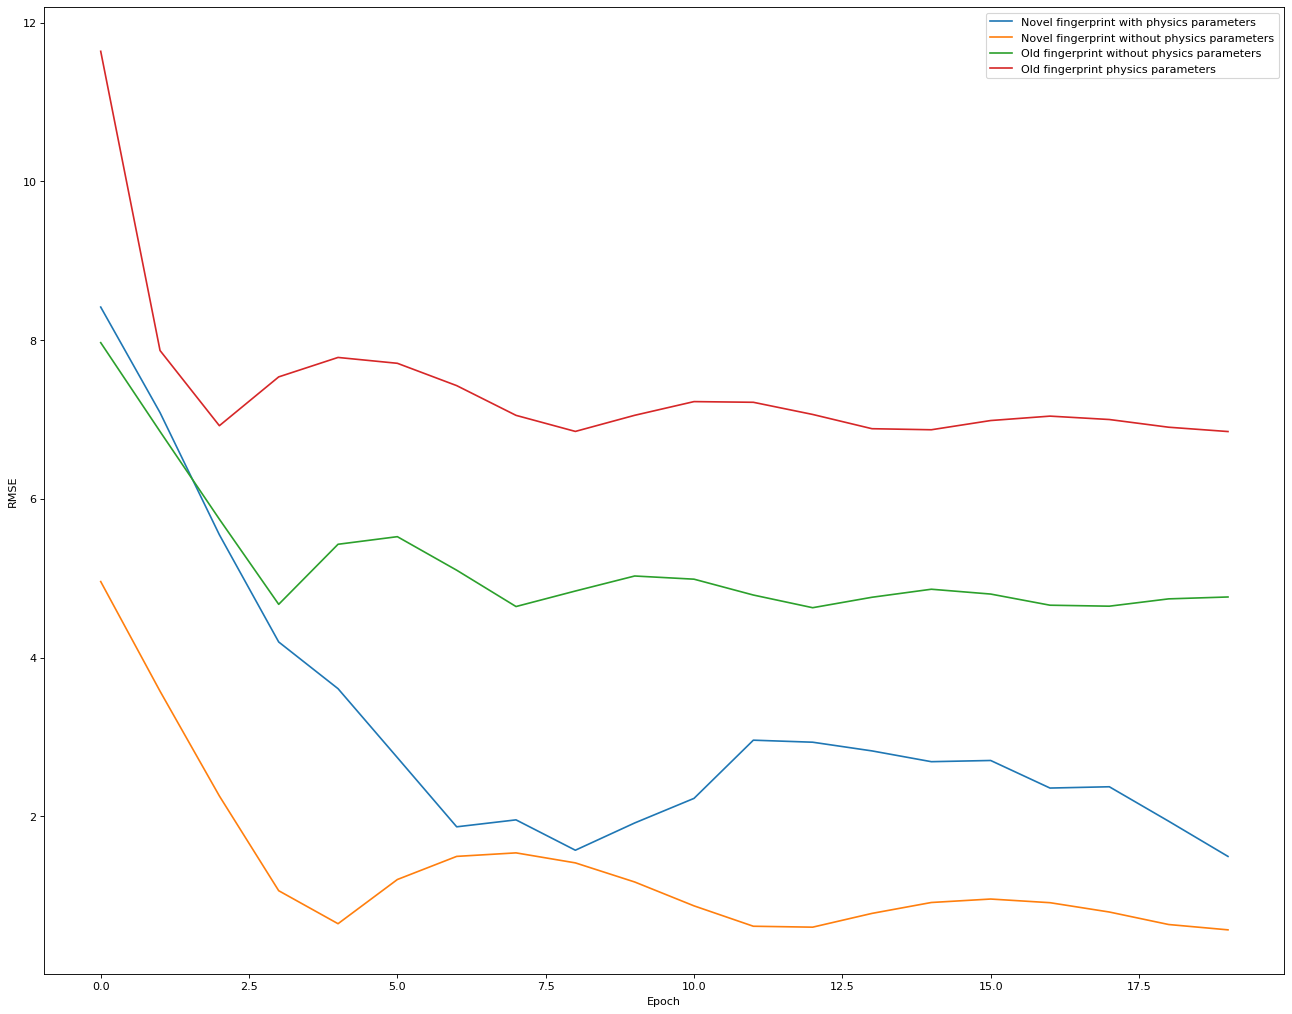

In [34]:
from matplotlib.pyplot import figure
figure(figsize=(20, 16), dpi=80)

plt.plot(np.array(res_pgcn_pg['loss'])[:20] - 2.5, label='Novel fingerprint with physics parameters')
plt.plot(res_pgcn_dd['loss'], label='Novel fingerprint without physics parameters')
plt.plot(res_pgnn_dd['loss'], label='Old fingerprint without physics parameters')
plt.plot(res_pgnn_pg['loss'], label='Old fingerprint physics parameters')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Analysis of weight

In [16]:
weights = pickle.load(open('weights_pgcn', 'rb'))

In [25]:
weights.shape

(35,)

In [18]:
coeffs = []
for i in range(20):
    coeffs.append(weights[:, i])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [19]:
coeffs = weights

In [27]:
features = [x.replace('IV', 'Implicit Valence')
 .replace('H', 'Hydrogen')for x in ['Atom C', 'Atom N', 'Atom O', 'Atom S', 'Atom F', 'Atom Type Unknown', 
                                    'Atom Degree 0', 'Atom Degree 1', 'Atom Degree 2', 'Atom Degree 3', 'Atom Degree 4',
        'IV 0', 'IV 1', 'IV 2', 'IV 3', 'IV 4', 'IV 5', 'IV 6', 'Formal Charge', '#Radical Electrons',
        'SP', 'SP2', 'SP3', 'SP3D', 'SP3D2', 'Is Aromatic', '0 H', '1 H', '2 H', '3 H', '4 H', '5 H', '6 H','Atom Mass', 'Atomic No']]

/tmp/ipykernel_10118/4090187316.py:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


<Figure size 960x640 with 0 Axes>

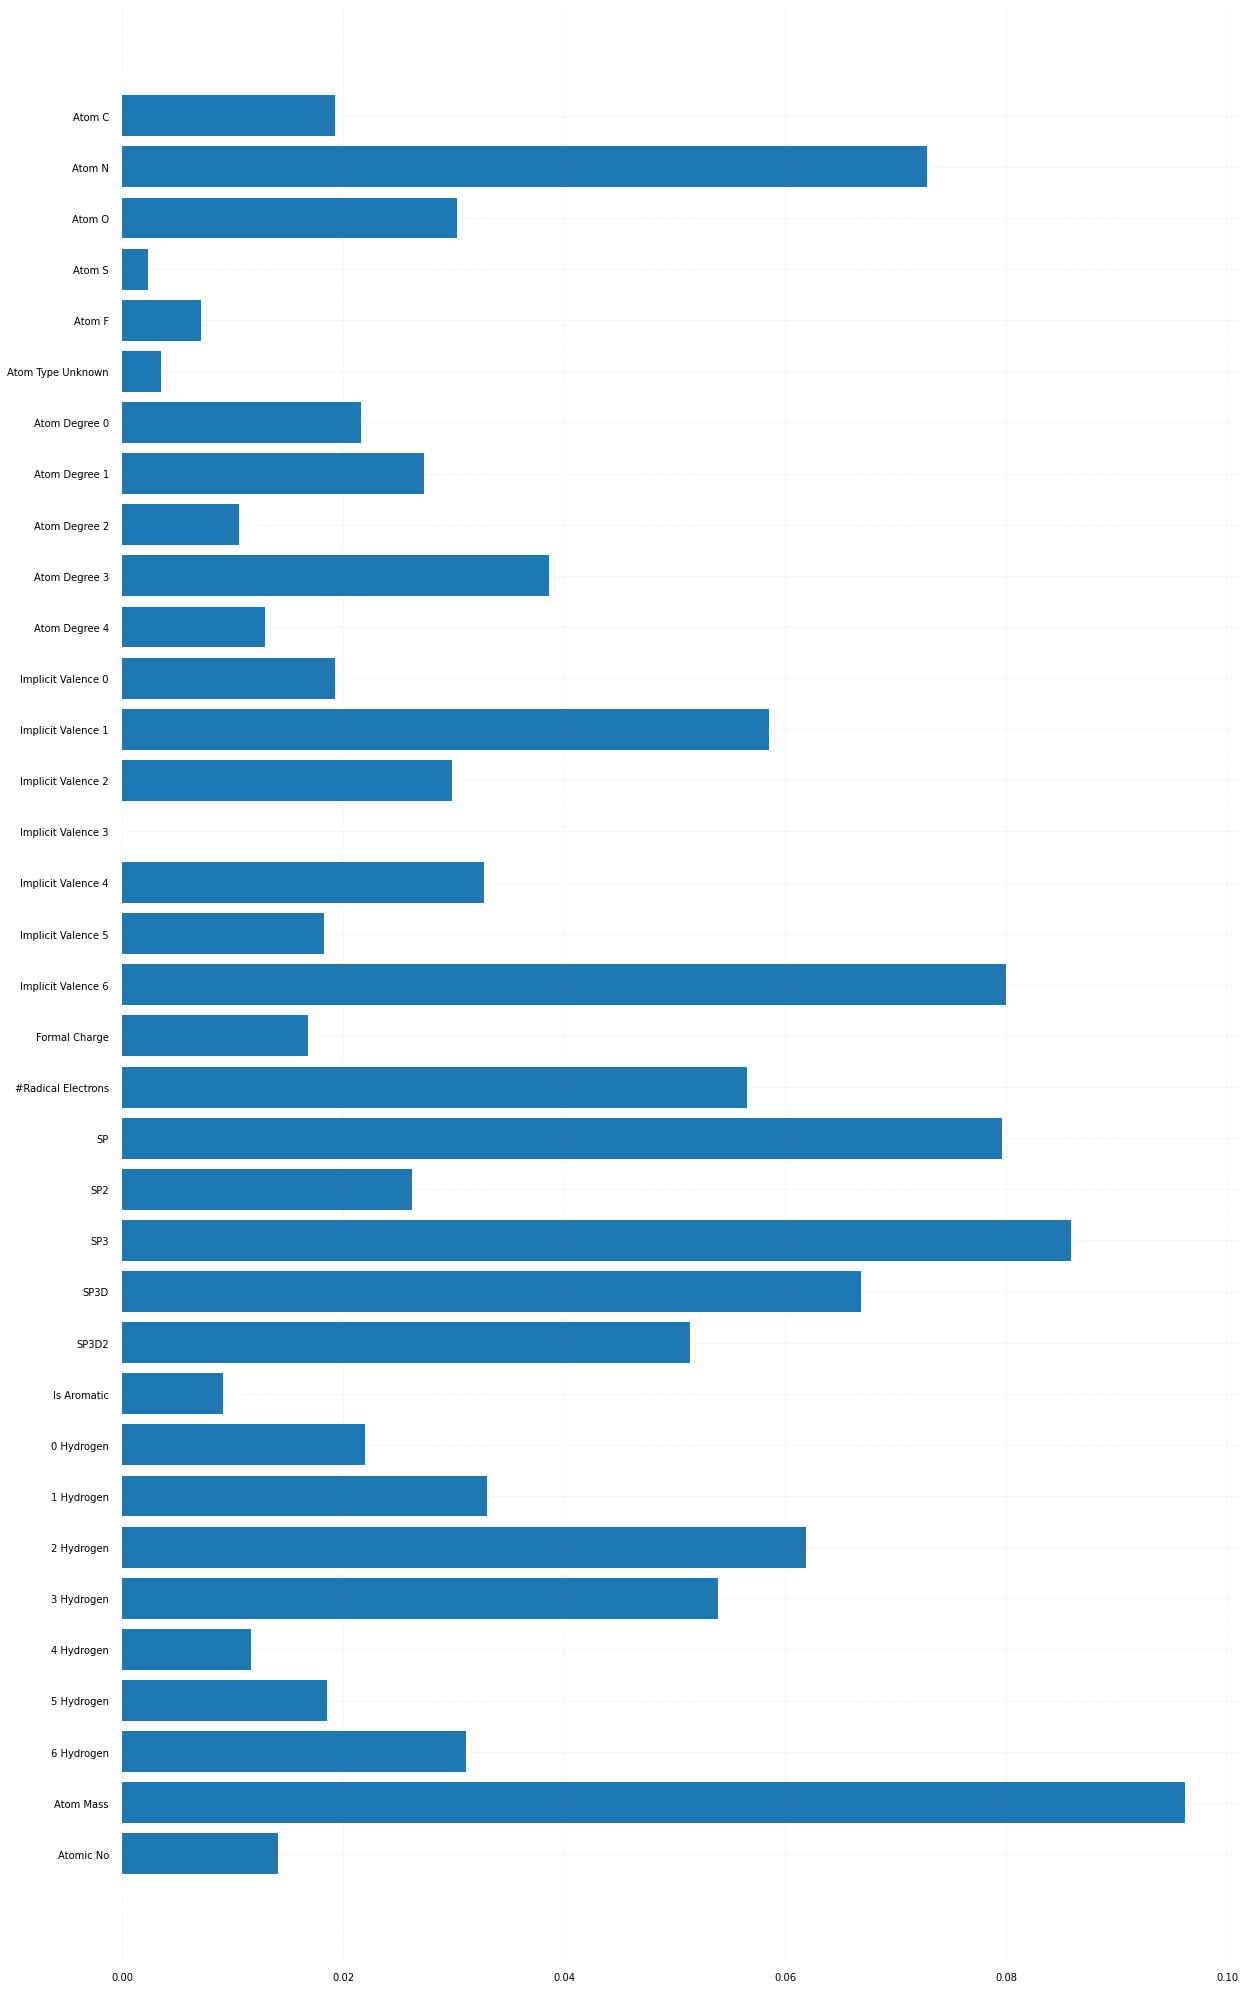

In [29]:
figure(figsize=(12, 8), dpi=80)
fig, ax = plt.subplots(figsize =(20, 36))
 
# Horizontal Bar Plot
ax.barh(features, np.abs(coeffs))
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
ax.invert_yaxis()

# for i in ax.patches:
#     plt.text(i.get_width()+0.2, i.get_y()+0.5,
#              str(round((i.get_width()), 2)),
#              fontsize = 10, fontweight ='bold',
#              color ='grey')
# fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
#          color ='grey', ha ='right', va ='bottom',
#          alpha = 0.7)
 
# Show Plot
plt.show()

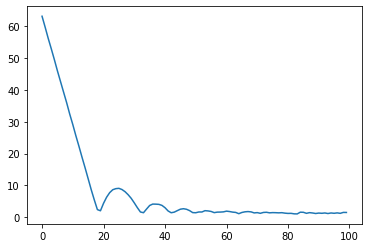

In [108]:
plt.plot(hist.history['loss'])

In [84]:
import pickle
with open('pg.pkl', 'wb') as file:
    pickle.dump(hist.history, file)

In [105]:
m.layers[-1].weights[0]

<tf.Variable 'pggcn_model_25/dense6/kernel:0' shape=(16, 1) dtype=float32, numpy=
array([[-0.21952896],
       [-0.27918267],
       [-0.33455047],
       [ 0.08897392],
       [ 0.0091808 ],
       [ 0.34150395],
       [ 0.07576769],
       [ 0.37838626],
       [ 0.45361787],
       [ 0.09978019],
       [-0.56457543],
       [-0.35083595],
       [-0.51481724],
       [-0.47485214],
       [ 0.13435419],
       [ 0.18943757]], dtype=float32)>

In [45]:
tf.matmul(l3[0], m.layers[4].weights[0])

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.30114257]], dtype=float32)>

In [109]:
input_shapes = []
for i in range(len(X_test)):
    input_shapes.append(np.array(X_test[i]).shape[0])
m.set_input_shapes(input_shapes)
for i in range(len(X_test)):
    if X_test[i].shape[0] < 2000:
        new_list = np.zeros([2000 - X_test[i].shape[0], 53])
#         for j in range(2000 - X_atoms[i].shape[0]):
#             new_list.append(np.zeros(53))
#         new_list.append(np.concatenate((info[i], [0]*65)))
        X_test[i] = np.concatenate([X_test[i], new_list], 0)
X_test = np.array(X_test)
y = np.array(y_test)
m.evaluate(X_test, y)

1/1 [==============================] - 3s 3s/step - loss: 25.4363


25.436281204223633

In [111]:
y

array([ 2.74,  2.99, 11.73,  6.16,  6.96,  7.88,  8.42])

In [110]:
m.predict(X_test)

array([[ 5.1323457],
       [ 5.0956197],
       [38.1814   ],
       [38.144802 ],
       [38.108044 ],
       [38.291683 ],
       [38.438297 ]], dtype=float32)

In [14]:
import pickle
res_pure_pgnn = pickle.load(open("../PGGCN/res_pure_pgnn.pkl", "rb"))
res_loss_pgnn = pickle.load(open("../PGGCN/res_loss_pgnn.pkl", "rb"))
res_dd = pickle.load(open("../PGGCN/res_dd.pkl", "rb"))

In [4]:
import matplotlib.pyplot as plt

In [15]:
res_dd

{'loss': [4.957535266876221,
  3.57555890083313,
  2.255244016647339,
  1.061207890510559,
  0.645363450050354,
  1.2023452520370483,
  1.493796467781067,
  1.5381064414978027,
  1.4120174646377563,
  1.171163558959961,
  0.8702523708343506,
  0.613366961479187,
  0.6018031239509583,
  0.7753024697303772,
  0.9126853346824646,
  0.9562525749206543,
  0.9102165699005127,
  0.7926766276359558,
  0.6351305246353149,
  0.567918062210083]}

In [15]:
import pickle
res_pgcn_pg = pickle.load(open('res.pkl', 'rb'))
res_pgcn_dd = pickle.load(open('res_dd.pkl', 'rb'))
res_pgnn_pg = pickle.load(open('res_loss_pgnn.pkl', 'rb'))
res_pgnn_dd = pickle.load(open('res_pure_pgnn.pkl', 'rb'))

In [30]:
len(res_pgcn_dd['loss'])

20

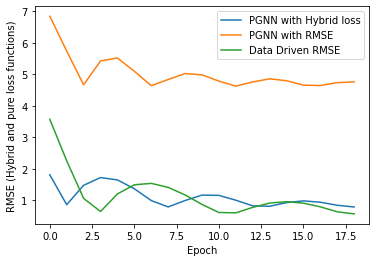

In [20]:
plt.plot(res_loss_pgnn['output_2_loss'][1:], label='PGNN with Hybrid loss')
plt.plot(res_pure_pgnn['loss'][1:], label='PGNN with RMSE')
plt.plot(res_dd['loss'][1:], label='Data Driven RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE (Hybrid and pure loss functions)')
plt.legend()
plt.show()

In [38]:
l0 = []
l1 = []
l2 = []
l3 = []
m_v = []
y_p = []
y_r = []
y_p_r = []
y_real_physics_error = []
for i in range(2):
    x = m.layers[0]([X[i]])
    l0.append(x)
    x = m.layers[1](x)
    l1.append(x)
#     x = m.layers[2](x)
    x = m.layers[2](x)
    l2.append(x)
    x = m.layers[3](x)
    l3.append(x)
    x = m.layers[4](x)
    m_v.append(x)
    pure_o = np.matmul(np.concatenate([x[0].numpy()[0].reshape([-1]), info[i].reshape([-1])], 0).reshape([1, -1]), m.layers[len(m.layers) - 1].weights[0].numpy())
#     x = m.layers[6](x)
    y_p.append(pure_o)
    y_p_r.append(np.matmul(info[i], -np.array([-1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])))
    y_real_physics_error.append(np.abs(y[i] - np.matmul(info[i], -np.array([-1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1]))))

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 616, in new_func
    return func(*args, **kwargs)  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2548, in while_loop_v2
    return while_loop(  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2795, in while_loop
    loop_vars = body(*loop_vars)  File "/home/ali/GBNN/PGGCN/layers_update_mobley.py", line 99, in b
    new_ordered_features.write(j, rule[1](self_features[0][rule[0][0]:rule[0][1]],  File "/home/ali/.local/lib/python3.8/site-packages/tensorflow/python/util/tf_should_use.py", line 243, in wrapped
    return _add_should_use_warning(fn(*args, **k

In [72]:
X_atoms = []
X_adj = []
for x in X_test:
    X_atoms.append(x[0])
    X_adj.append(x[1])
input_shapes = []
for i in range(len(X_atoms)):
    input_shapes.append(np.array(X_atoms[i]).shape[0])
m.set_input_shapes(input_shapes)
for i in range(len(X_atoms)):
    if X_atoms[i].shape[0] < 2000:
        new_list = X_atoms[i].tolist()
        for j in range(1100 - X_atoms[i].shape[0]):
            new_list.append([0.0]*36)
#         new_list.append(np.concatenate((info[i], [0]*65)))
        X_atoms[i] = np.array(new_list)
m.set_adjacency_list(X_adj)
m.set_physics_info(info_test)
X_atoms = np.array(X_atoms)
y = np.array(y_test)
pred = m.evaluate(X_atoms, y)

1/1 [==============================] - 3s 3s/step - loss: 14.6076 - output_1_loss: 7.3038 - output_2_loss: 7.3038 - output_1_pure_rmse: 7.3038 - output_1_root_mean_squared_error: 12.3038 - output_2_pure_rmse: 7.3038 - output_2_root_mean_squared_error: 12.3038
